In [1]:
import json
import pandas as pd
import h5py
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed, Conv1D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import os
import h5py
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.regularizers import l1
import ast
from tqdm import tqdm

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=1024, epochs=50
)

Epoch 1/50
59/59 [==============================] - 8s 139ms/step - loss: 2.3124 - accuracy: 0.2471 - val_loss: 2.2269 - val_accuracy: 0.3140
Epoch 2/50
59/59 [==============================] - 7s 127ms/step - loss: 2.1094 - accuracy: 0.4385 - val_loss: 1.9928 - val_accuracy: 0.5502
Epoch 3/50
59/59 [==============================] - 8s 137ms/step - loss: 1.9191 - accuracy: 0.6130 - val_loss: 1.8591 - val_accuracy: 0.6790
Epoch 4/50
59/59 [==============================] - 7s 127ms/step - loss: 1.8083 - accuracy: 0.7222 - val_loss: 1.7613 - val_accuracy: 0.7596
Epoch 5/50
59/59 [==============================] - 6s 108ms/step - loss: 1.7385 - accuracy: 0.7743 - val_loss: 1.7100 - val_accuracy: 0.7982
Epoch 6/50
59/59 [==============================] - 8s 129ms/step - loss: 1.6987 - accuracy: 0.8042 - val_loss: 1.6764 - val_accuracy: 0.8239
Epoch 7/50
59/59 [==============================] - 8s 128ms/step - loss: 1.6755 - accuracy: 0.8220 - val_loss: 1.6746 - val_accuracy: 0.8222
Epoch 

In [9]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

In [6]:
learningCurve(history)

NameError: name 'history' is not defined

In [4]:
y_test.shape

(10000,)

In [10]:
yhot = np.zeros((10000, 10))

In [11]:
yhot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
num = 0
for x in y_test:
    if x == 0:
        yhot[num , 0] = 1
    if x ==1:
        yhot[num, 1] = 1
    if x == 2:
        yhot[num , 2] = 1
    if x == 3:
        yhot[num , 3] = 1
    if x == 4:
        yhot[num, 4] = 1
    if x == 5:
        yhot[num, 5] = 1
    if x == 6:
        yhot[num, 6]= 1
    if x == 7:
        yhot[num, 7] = 1
    if x == 8:
        yhot[num, 8] = 1
    if x == 9: 
        yhot[num, 9] = 1
    num = num + 1
    

In [11]:
yhot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LSTM ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

In [21]:
labels = ['0', '1','2','3','4','5','6','7','8','9']

In [10]:
y_pred = makeRoc(x_test.astype('float64'), yhot.astype('float64'), labels, model, outputSuffix='two-layer')

NameError: name 'model' is not defined

In [53]:
Inputs = Input(shape=(28,28))
x = Flatten()(Inputs)
x = Dense(256, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
predictions = Dense(10, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1_relu (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 64)                8256

In [54]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [55]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=1024, epochs=50
)

Epoch 1/50
59/59 [==============================] - 1s 25ms/step - loss: 2.1944 - accuracy: 0.2401 - val_loss: 2.0018 - val_accuracy: 0.4031
Epoch 2/50
59/59 [==============================] - 2s 26ms/step - loss: 2.0116 - accuracy: 0.4237 - val_loss: 1.9275 - val_accuracy: 0.4983
Epoch 3/50
59/59 [==============================] - 1s 22ms/step - loss: 1.9158 - accuracy: 0.5355 - val_loss: 1.8134 - val_accuracy: 0.6466
Epoch 4/50
59/59 [==============================] - 1s 24ms/step - loss: 1.8337 - accuracy: 0.6202 - val_loss: 1.7412 - val_accuracy: 0.6902
Epoch 5/50
59/59 [==============================] - 2s 26ms/step - loss: 1.7628 - accuracy: 0.7113 - val_loss: 1.6349 - val_accuracy: 0.8726
Epoch 6/50
59/59 [==============================] - 2s 29ms/step - loss: 1.6800 - accuracy: 0.8046 - val_loss: 1.5412 - val_accuracy: 0.9229
Epoch 7/50
59/59 [==============================] - 2s 29ms/step - loss: 1.6226 - accuracy: 0.8511 - val_loss: 1.5279 - val_accuracy: 0.9338
Epoch 8/50
59

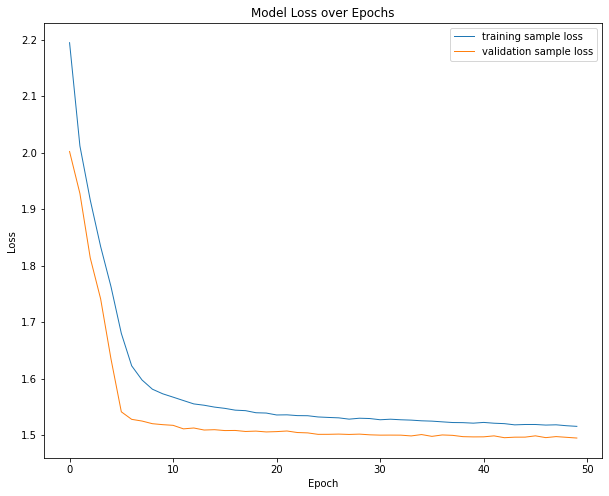

In [56]:
learningCurve(history)

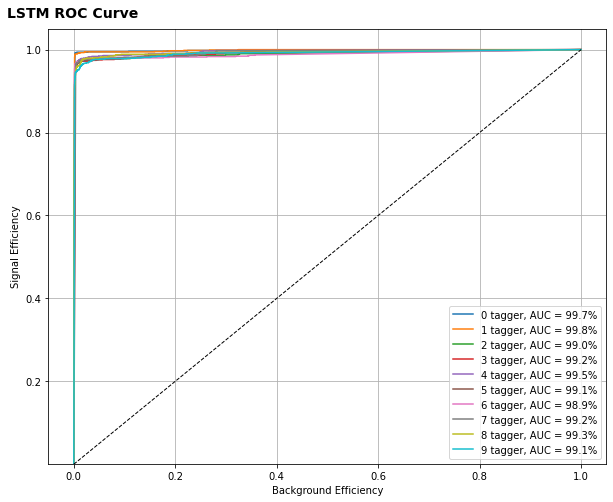

In [57]:
y_pred = makeRoc(x_test.astype('float64'), yhot.astype('float64'), labels, model, outputSuffix='two-layer')

In [32]:
Inputs = Input(shape=(28,28))
x = LSTM(15, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.3)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
predictions = Dense(10, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 15)                2640      
_________________________________________________________________
fc4 (Dense)                  (None, 32)                512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
fc7 (Dense)                  (None, 16)                528       
_________________________________________________________________
output_sigmoid (Dense)       (None, 10)                170       
Total params: 3,850
Trainable params: 3,850
Non-trainable params: 0
_________________________________________________________

In [33]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [34]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=1024, epochs=100
)

Epoch 1/100
59/59 [==============================] - 7s 124ms/step - loss: 2.3205 - accuracy: 0.1506 - val_loss: 2.3021 - val_accuracy: 0.1903
Epoch 2/100
59/59 [==============================] - 6s 96ms/step - loss: 2.2302 - accuracy: 0.2607 - val_loss: 2.1295 - val_accuracy: 0.3912
Epoch 3/100
59/59 [==============================] - 6s 102ms/step - loss: 2.0855 - accuracy: 0.4150 - val_loss: 1.9869 - val_accuracy: 0.5141
Epoch 4/100
59/59 [==============================] - 6s 106ms/step - loss: 1.9953 - accuracy: 0.4962 - val_loss: 1.9391 - val_accuracy: 0.5414
Epoch 5/100
59/59 [==============================] - 7s 115ms/step - loss: 1.9557 - accuracy: 0.5289 - val_loss: 1.9062 - val_accuracy: 0.5728
Epoch 6/100
59/59 [==============================] - 7s 112ms/step - loss: 1.9239 - accuracy: 0.5589 - val_loss: 1.8841 - val_accuracy: 0.5923
Epoch 7/100
59/59 [==============================] - 6s 110ms/step - loss: 1.8974 - accuracy: 0.5839 - val_loss: 1.8614 - val_accuracy: 0.6134


59/59 [==============================] - 5s 85ms/step - loss: 1.6444 - accuracy: 0.8302 - val_loss: 1.6395 - val_accuracy: 0.8328
Epoch 59/100
59/59 [==============================] - 6s 109ms/step - loss: 1.6435 - accuracy: 0.8307 - val_loss: 1.6392 - val_accuracy: 0.8337
Epoch 60/100
59/59 [==============================] - 5s 92ms/step - loss: 1.6397 - accuracy: 0.8344 - val_loss: 1.6339 - val_accuracy: 0.8375
Epoch 61/100
59/59 [==============================] - 9s 152ms/step - loss: 1.6370 - accuracy: 0.8366 - val_loss: 1.6314 - val_accuracy: 0.8408
Epoch 62/100
59/59 [==============================] - 7s 112ms/step - loss: 1.6363 - accuracy: 0.8374 - val_loss: 1.6312 - val_accuracy: 0.8409
Epoch 63/100
59/59 [==============================] - 6s 99ms/step - loss: 1.6355 - accuracy: 0.8382 - val_loss: 1.6349 - val_accuracy: 0.8368
Epoch 64/100
59/59 [==============================] - 7s 119ms/step - loss: 1.6341 - accuracy: 0.8393 - val_loss: 1.6302 - val_accuracy: 0.8419
Epoch 65

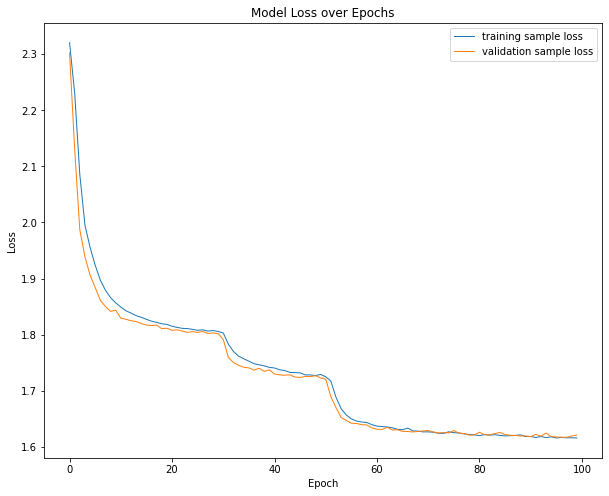

In [35]:
learningCurve(history)

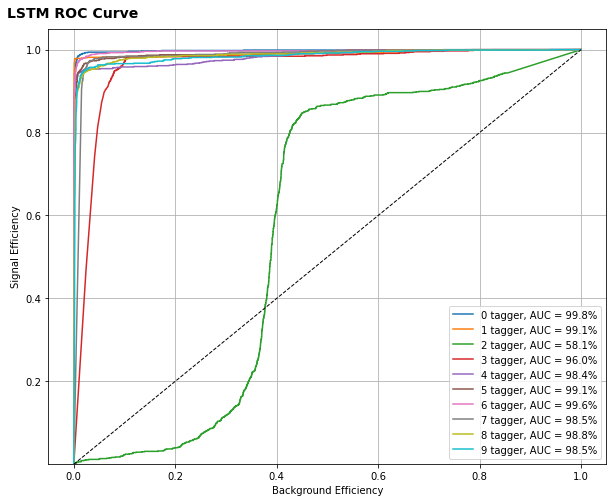

In [36]:
y_pred = makeRoc(x_test.astype('float64'), yhot.astype('float64'), labels, model, outputSuffix='two-layer')

In [17]:
Inputs = Input(shape=(28,28))
x = LSTM(16, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Flatten(trainable= True)(x)
predictions = Dense(10, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 16)                2880      
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
output_sigmoid (Dense)       (None, 10)                170       
Total params: 3,050
Trainable params: 3,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [19]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=1024, epochs=100
)

Epoch 1/100
59/59 [==============================] - 6s 105ms/step - loss: 2.3172 - accuracy: 0.2039 - val_loss: 2.2928 - val_accuracy: 0.3158
Epoch 2/100
59/59 [==============================] - 8s 132ms/step - loss: 2.2408 - accuracy: 0.3509 - val_loss: 2.1725 - val_accuracy: 0.3933
Epoch 3/100
59/59 [==============================] - 6s 107ms/step - loss: 2.1045 - accuracy: 0.4493 - val_loss: 2.0397 - val_accuracy: 0.5058
Epoch 4/100
59/59 [==============================] - 7s 127ms/step - loss: 1.9939 - accuracy: 0.5476 - val_loss: 1.9573 - val_accuracy: 0.5676
Epoch 5/100
59/59 [==============================] - 5s 83ms/step - loss: 1.9276 - accuracy: 0.5857 - val_loss: 1.9118 - val_accuracy: 0.5902
Epoch 6/100
59/59 [==============================] - 5s 92ms/step - loss: 1.8910 - accuracy: 0.6112 - val_loss: 1.8819 - val_accuracy: 0.6217
Epoch 7/100
59/59 [==============================] - 6s 95ms/step - loss: 1.8623 - accuracy: 0.6519 - val_loss: 1.8503 - val_accuracy: 0.6684
Ep

59/59 [==============================] - 6s 96ms/step - loss: 1.5455 - accuracy: 0.9348 - val_loss: 1.5475 - val_accuracy: 0.9325
Epoch 59/100
59/59 [==============================] - 6s 100ms/step - loss: 1.5455 - accuracy: 0.9354 - val_loss: 1.5482 - val_accuracy: 0.9309
Epoch 60/100
59/59 [==============================] - 7s 113ms/step - loss: 1.5435 - accuracy: 0.9370 - val_loss: 1.5463 - val_accuracy: 0.9336
Epoch 61/100
59/59 [==============================] - 6s 107ms/step - loss: 1.5432 - accuracy: 0.9371 - val_loss: 1.5463 - val_accuracy: 0.9330
Epoch 62/100
59/59 [==============================] - 5s 93ms/step - loss: 1.5429 - accuracy: 0.9373 - val_loss: 1.5461 - val_accuracy: 0.9335
Epoch 63/100
59/59 [==============================] - 6s 99ms/step - loss: 1.5425 - accuracy: 0.9374 - val_loss: 1.5465 - val_accuracy: 0.9330
Epoch 64/100
59/59 [==============================] - 6s 100ms/step - loss: 1.5417 - accuracy: 0.9380 - val_loss: 1.5467 - val_accuracy: 0.9320
Epoch 65

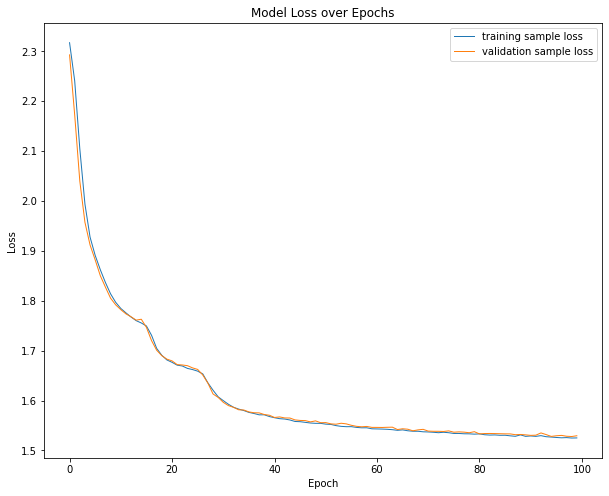

In [20]:
learningCurve(history)

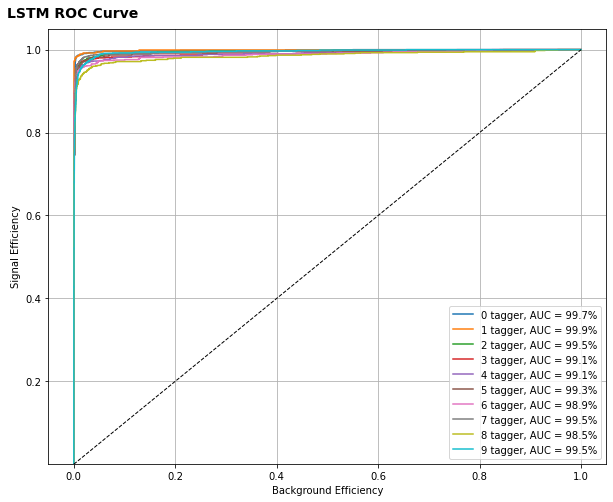

In [22]:
y_pred = makeRoc(x_test.astype('float64'), yhot.astype('float64'), labels, model, outputSuffix='two-layer')

In [11]:
def Pair_inputs(data, num_tracks_for_pairing = 28):
    """
        assuming data shape is: (batch, num_tracks, 13)
    
        returns:
        ---------
        (batch , num_tracks_for_pairing**2, 26)
    """

    # Example: input of shape (batch, 10 (const. #tracks), 13)
    # --> 100 pairs including (a,b), (b,a)
    # stacking the pairs' features together --> 2*13 features
    # will be re-permuted & duplicated into (batch, 100, 26)
    # [optional] transpose / reshape --> (batch * 100, 26)

    sp = data.shape
    
    num_feat = sp[2]
    assert data.ndim==3

    result = np.zeros((sp[0], num_tracks_for_pairing**2, num_feat*2),'float32')

    
    for i in range(num_tracks_for_pairing):
        result[:, i::num_tracks_for_pairing, :num_feat] = data
        result[:, i*num_tracks_for_pairing:num_tracks_for_pairing + i*num_tracks_for_pairing, num_feat:] = data

    return result

In [12]:
pair = Pair_inputs(x_train)

In [13]:
pair.shape

(60000, 784, 56)

In [18]:
pair2 = Pair_inputs(x_test)

In [14]:
Inputs = Input(shape=(784,56))
x = TimeDistributed(Dense(10, activation='relu', kernel_initializer='lecun_uniform', name='fc1'))(Inputs)
x= Dropout(rate = 0.3)(x)
x=Flatten()(x)
x = Dense(6, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x = Dropout(rate = 0.3)(x)
x = Dense(2, activation='relu', kernel_initializer='lecun_uniform', name='fc6')(x)

predictions = Dense(10, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784, 56)]         0         
_________________________________________________________________
time_distributed (TimeDistri (None, 784, 10)           570       
_________________________________________________________________
dropout (Dropout)            (None, 784, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 7840)              0         
_________________________________________________________________
fc7 (Dense)                  (None, 6)                 47046     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
fc6 (Dense)                  (None, 2)                 14    

In [15]:
Inputs = Input(shape=(784,56))
x = Conv1D(5,1, activation = 'relu', kernel_initializer = 'lecun_uniform')(Inputs)
x= Dropout(rate = 0.3)(x)
x=Flatten()(x)
x = Dense(2, activation='relu', kernel_initializer='lecun_uniform', name='fc6')(x)

predictions = Dense(10, activation='softmax', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784, 56)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 784, 5)            285       
_________________________________________________________________
dropout_2 (Dropout)          (None, 784, 5)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
fc6 (Dense)                  (None, 2)                 7842      
_________________________________________________________________
output_sigmoid (Dense)       (None, 10)                30        
Total params: 8,157
Trainable params: 8,157
Non-trainable params: 0
_________________________________________________________

In [16]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [1]:
history = model.fit(
    pair, y_train, validation_data=(pair2, y_test), batch_size=1024, epochs=50
)

NameError: name 'model' is not defined

In [16]:

l1Reg =  0.0001
l1RegR = 0.001

Inputs = Input(shape = (28,28))

x = GRU(16,kernel_regularizer=l1(l1Reg),recurrent_regularizer=l1(l1RegR),activation='relu', recurrent_activation='sigmoid', name='gru_selu',)(Inputs)
x = Dense(20,kernel_regularizer=l1(l1Reg),activation='relu', kernel_initializer='lecun_uniform', name='dense_relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(10, activation='softmax', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
gru_selu (GRU)               (None, 16)                2208      
_________________________________________________________________
dense_relu (Dense)           (None, 20)                340       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
rnn_densef (Dense)           (None, 10)                210       
Total params: 2,758
Trainable params: 2,758
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [20]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=1024, epochs=50
)

Epoch 1/50
59/59 [==============================] - 8s 139ms/step - loss: 2.3911 - accuracy: 0.1010 - val_loss: 2.3661 - val_accuracy: 0.1028
Epoch 2/50
59/59 [==============================] - 10s 167ms/step - loss: 2.3412 - accuracy: 0.1044 - val_loss: 2.3153 - val_accuracy: 0.1028
Epoch 3/50
59/59 [==============================] - 9s 154ms/step - loss: 2.2933 - accuracy: 0.1566 - val_loss: 2.2758 - val_accuracy: 0.2214
Epoch 4/50
59/59 [==============================] - 9s 149ms/step - loss: 2.2598 - accuracy: 0.2345 - val_loss: 2.2417 - val_accuracy: 0.2829
Epoch 5/50
59/59 [==============================] - 7s 119ms/step - loss: 2.1972 - accuracy: 0.3110 - val_loss: 2.1353 - val_accuracy: 0.3683
Epoch 6/50
59/59 [==============================] - 6s 99ms/step - loss: 2.1009 - accuracy: 0.3914 - val_loss: 2.0328 - val_accuracy: 0.4725
Epoch 7/50
59/59 [==============================] - 6s 100ms/step - loss: 2.0118 - accuracy: 0.4913 - val_loss: 1.9378 - val_accuracy: 0.5823
Epoch 

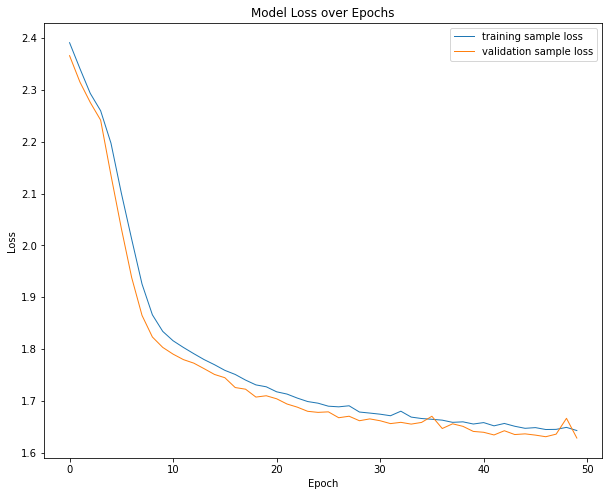

In [21]:
learningCurve(history)

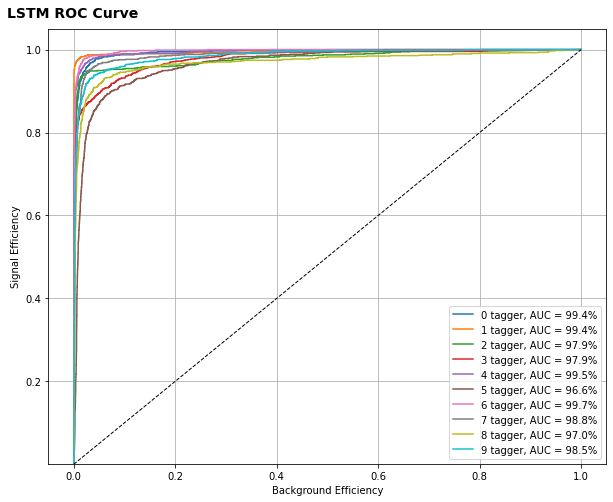

In [22]:
y_pred = makeRoc(x_test.astype('float64'), yhot.astype('float64'), labels, model, outputSuffix='two-layer')

In [28]:

l1Reg =  0.0001
l1RegR = 0.001

Inputs = Input(shape = (28,28))

x = GRU(32,kernel_regularizer=l1(l1Reg),recurrent_regularizer=l1(l1RegR), kernel_initializer = 'VarianceScaling', activation='relu', recurrent_activation='sigmoid', name='gru_selu',)(Inputs)
x = Flatten(trainable = True)(x)
predictions = Dense(10, activation='softmax', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
gru_selu (GRU)               (None, 32)                5952      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
rnn_densef (Dense)           (None, 10)                330       
Total params: 6,282
Trainable params: 6,282
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

In [30]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=1024, epochs=50
)

Epoch 1/50
59/59 [==============================] - 10s 166ms/step - loss: 2.5134 - accuracy: 0.1084 - val_loss: 2.4398 - val_accuracy: 0.0991
Epoch 2/50
59/59 [==============================] - 10s 167ms/step - loss: 2.3918 - accuracy: 0.1039 - val_loss: 2.3510 - val_accuracy: 0.1028
Epoch 3/50
48/59 [=======================>......] - ETA: 1s - loss: 2.3268 - accuracy: 0.1060

KeyboardInterrupt: 